<a href="https://colab.research.google.com/github/lucaskmiyazaki/optimization/blob/master/optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy import linalg as la
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [ ]:
# calculo da sensiibilidade
E = 207
A1 = 2.5
A2 = 1
A3 = 2.5
L1 = 100*np.sqrt(2)
L2 = 100
L3 = 100*np.sqrt(2)
F1 = 40000
dA2 = 0.1
K = (E/2)*np.array([[A1/L1 + A3/L3, -A1/L1 + A3/L3],[-A1/L1 + A3/L3, A1/L1 + 2*A2/L2 + A3/L3]])
A2 = A2 + dA1
K2 = (E/2)*np.array([[A1/L1 + A3/L3, -A1/L1 + A3/L3],[-A1/L1 + A3/L3, A1/L1 + 2*A2/L2 + A3/L3]])
F = -F1*(np.sqrt(2)/2)*np.array([1, 1])
inv_K = la.inv(K)
#dK = (103.5*np.sqrt(2)/200)*np.array([[1, -1], [-1, 1]])
dK = (K2 - K)/dA1
U = (la.solve(K, F))
U2 = (la.solve(K2, F))
dU = np.dot(inv_K, -np.dot(dK, U))
#dC = np.dot(-np.transpose(U), np.dot(dK, U))
C = np.dot(np.transpose(U), np.dot(K, U))
C2 = np.dot(np.transpose(U2), np.dot(K2, U2))
dC = (C2-C)/dA1
print(dK, dC)
theta = 3*np.pi/4
sigma = E*(U[0]*np.cos(theta) + U[1]*np.sin(theta))/L3
sigma2 = E*(U2[0]*np.cos(theta) + U2[1]*np.sin(theta))/L3
ds = (sigma2 - sigma)/dA2
print(sigma)

[[0.   0.  ]
 [0.   2.07]] -48690727.80040085
2890.416764108682


In [ ]:
# autovetor e autovalor
H = np.array([[42, -24], [-24, 28]])
print(H)
w, v = la.eig(H)
print(w)

[60. 10.]


In [ ]:
# lin system solver
a = np.array([[42, -24], [-24, 28]])
b = np.array([-30,60])
np.linalg.solve(a, b)

array([1., 3.])

Text(0.5, 0, 'z')

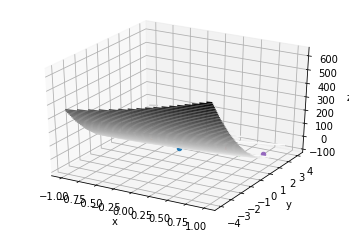

In [ ]:
# 3d plot
import matplotlib.pyplot as plt
def f(x, y):
    return 21*x**2 - 24*x*y+ 30*x+ 14*y**2-60*y
x = np.linspace(-1, 1, 10)
y = np.linspace(-4, 4, 10)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.scatter(0, 0, 0)
ax.scatter(-0.6, 1.2, -45)
ax.scatter(0.6, 1.8, -63)
ax.scatter(0.36, 2.28, -70.2)
ax.scatter(0.84, 2.52, -73.08)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

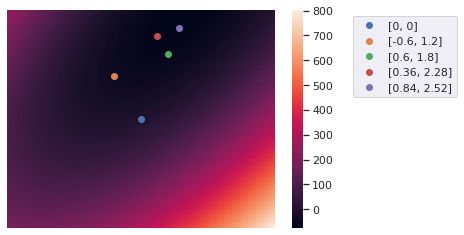

In [ ]:
# heatmap plot
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()

def f(x, y):
    return 21*x**2 - 24*x*y+ 30*x+ 14*y**2-60*y
p = 3
p0 = -p
pf = p
s = 100
x = np.linspace(p0, pf, s)
y = np.linspace(p0, pf, s)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ax = sns.heatmap(Z, xticklabels=False, yticklabels= False)
points = [[0, 0], [-0.6, 1.2], [0.6, 1.8], [0.36, 2.28], [0.84, 2.52]]
#points = [[0, 0], [-0.7142857142857143, 0.0], [-0.7142857142857143, 1.5306122448979593], [0.16034985422740522, 1.5306122448979593], [0.16034985422740522, 2.2802998750520618], [0.5887427857440353, 2.2802998750520618], [0.5887427857440353, 2.6474938163520303]]
for i in range(len(points)):
  ax.scatter(s/2 + points[i][0]*s/(2*p), s/2 + points[i][1]*s/(2*p))
ax.invert_yaxis()
ax.legend(points, bbox_to_anchor=(1.7, 1))

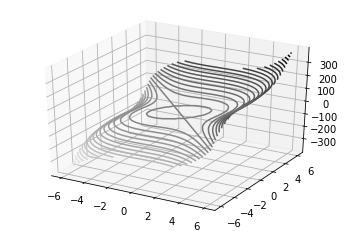

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot 3d
ax = plt.axes(projection='3d')
plt.figure()

# evenly sampled time at 200ms intervals from 0 to 5s
#F = np.arange(0., 5., 0.2)
x1 = np.linspace(-6, 6, 30)
x2 = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x1, x2)
Z = F(X, Y)

# Data for a three-dimensional 
ax.contour3D(X, Y, Z,  50, cmap='binary')

# red dashes, blue squares and green triangles
#plt.plot(t, t, 'r--')
plt.show()

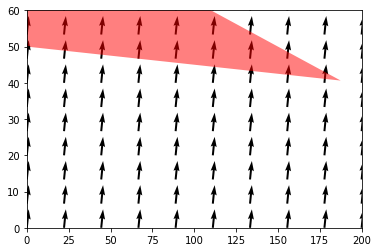

In [ ]:
# gradient plot
import numpy as np
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import Symbol
import sympy

# find domain from inequalities
def f1(x):
    return -0.05*x+50
def f2(x):
    return -0.25*x+87.5
def f3(x):
    return 1000000*x

# fill domain region
x = Symbol('x')
x1, =  solve(f1(x)-f2(x))
x2, =  solve(f1(x)-f3(x))
x3, =  solve(f2(x)-f3(x))
y1 = f1(x1)
y2 = f1(x2)
y3 = f2(x3)
plt.fill([x1,x2,x3,x1],[y1,y2,y3,y1],'red',alpha=0.5)

# trace border lines
xr = np.linspace(0.0,2.0,100)
y1r = f1(xr)
y2r = f2(xr)
y3r = f3(xr)
plt.plot(xr,y1r,'k--')
plt.plot(xr,y2r,'k--')
#plt.plot(xr,y3r,'k--')
plt.xlim(0.0,200) # x>0
plt.ylim(0.0,60) # y>0

# define gradient
x,y=sympy.symbols('x y')
fun= x + 10*y

# take the gradient symbolically
gradfun=[sympy.diff(fun,var) for var in (x,y)]

# turn into a bivariate lambda for numpy
numgradfun=sympy.lambdify([x,y],gradfun)

X,Y=np.meshgrid(np.linspace(0,200,10),np.linspace(0,60, 10))
graddat=numgradfun(X,Y)

#plt.figure()
plt.quiver(X,Y,graddat[0],graddat[1])

plt.show()

In [ ]:
import scipy.optimize as opt
import numpy as np
# otimizacao de primeira ordem
def f(x):   
  return 8*x[0]**4 + 5*x[1]**4 + 2*x[1]**2 - 36*x[0]**2
def grad(x):
  return np.array((32*x[0]**3 - 72*x[0]),(20*x[1]**3 + 4*x[1]))

opt.minimize(f, [-1, 0], method="CG", jac = grad)    

     fun: -39.74656194262167
     jac: array(2.95706968)
 message: 'Desired error not necessarily achieved due to precision loss.'
    nfev: 111
     nit: 2
    njev: 96
  status: 2
 success: False
       x: array([-1.47902698, -0.47902698])

In [ ]:
def f(x):   # The rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2
def jacobian(x):
    return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

opt.minimize(f, [2, 1], method="CG", jac=jacobian)    


     fun: 1.0912121775174348e-11
     jac: array([-5.25283405e-06,  2.92893689e-07])
 message: 'Optimization terminated successfully.'
    nfev: 27
     nit: 13
    njev: 27
  status: 0
 success: True
       x: array([0.99999533, 0.99999081])

In [ ]:
# manipulacao simbolica
import numpy as np
import sympy as sym

class Function:
  def __init__(self, f):
    self.f = f

  def getFunction(self):
    return self.f

  def getValue(self, p):
    return self.f.subs(x, p[0]).subs(y, p[1]).subs(r, p[2])

  def getGrad(self, p):
    return np.array([sym.diff(self.f, x).subs(x, p[0]).subs(y, p[1]).subs(r, p[2]), sym.diff(self.f, y).subs(x, p[0]).subs(y, p[1]).subs(r, p[2])])

  def getDiff(self, dir, p):
    return np.dot(self.getGrad(p), dir)

def fun(x, y, r):
  return 2*x**2 + 3*x*y + y**2

x = sym.Symbol('x')
y = sym.Symbol('y')
r = sym.Symbol('r')
f = Function(fun(x, y, r))
print(f.getFunction())
print(f.getValue([1,1, 1]))
print(f.getGrad([1,1, 1]))
print(f.getDiff([1,1], [1,1,1]))

2*x**2 + 3*x*y + y**2
6
[7 5]
12


In [ ]:
def dist(pos):
  return (pos[0]**2+pos[1]**2)**(1/2)

# find minimum point
def minimum(pos, grad, f, e):
  """
  for a 2 variables function find the minimum value in a straight line
  from the initial position pos and the direction dir
  return the position of the point
  """
  df1 = f.getDiff(grad, pos)
  if df1 == 0:
    return pos
  df2 = f.getDiff(grad, pos-grad)
  i = 1
  while (df1>0 and df2>0) or (df1<0 and df2<0): # encontrar um intervalo onde se encontra a raiz
    i*=2
    df2 = f.getDiff(grad, pos-grad*i)
    if i > 100000:
      raise Exception("function error: Could not find minimum")
  pos1 = pos
  pos2 = pos-grad*i
  
  while dist(pos1-pos2)-e > 0:
    pos3 = (pos1+pos2)/2
    df3 = f.getDiff(grad, pos3)
    if (df1>0 and df3>0) or (df1<0 and df3<0):
      df1 = df3
      pos1 = pos3
    else:
      df2 = df3
      pos2 = pos3

  return (pos1+pos2)/2

def fun(x, y):
  return 2*x**2 
x = sym.Symbol('x')
y = sym.Symbol('y')
f = Function(fun(x, y))
pos = np.array([1, 1])
grad = f.getGrad(pos)
print(grad)
minimum(pos, grad, f, 0.001)

[4 0]


array([1/2048, 1], dtype=object)

In [ ]:
def minimum(grad, pos, f):
  sx = -grad[0]
  sy = -grad[1]
  px = pos[0]
  py = pos[1]
  r = pos[2]
  
  d = -2*r*sx*sy + (r+1)*sx**2 + (r+1)*sy**2
  #print(r*(-px+2) )
  alfa = sx*(r*(-px+py+2) - px + 4) + sy*(r*(px-2) - (r+1)*py)
  alfa = alfa/d
  temp = (py + alfa*sy) - (px + alfa*sx) + 2
  print("G:", float(temp))
  if temp >= 0:
    print("heyyy")
    d = sx**2 + sy**2
    alfa = (px-4)*sx + py*sy 
    alfa = -alfa/d  
  print("alfa: ", float(alfa))
  return np.array([px+sx*alfa, py+sy*alfa, r])

In [ ]:
# penalizacao externa
import sympy as sym
import numpy as np

class Function:
  def __init__(self):
    self.f1 = x**2 + y**2 -8*x + r*(-y+x-2)**2
    self.f = x**2 + y**2 -8*x

  def getValue(self, p):
    if -p[1]+p[0]-2 > 0:
      return self.f1.subs(x, p[0]).subs(y, p[1]).subs(r, p[2])
    else:
      return self.f.subs(x, p[0]).subs(y, p[1]).subs(r, p[2])

  def getGrad(self, p):
    if -p[1]+p[0]-2 > 0:
      res = np.array([sym.diff(self.f1, x).subs(x, p[0]).subs(y, p[1]).subs(r, p[2]), sym.diff(self.f1, y).subs(x, p[0]).subs(y, p[1]).subs(r, p[2])])
    else:
      res = np.array([sym.diff(self.f, x).subs(x, p[0]).subs(y, p[1]).subs(r, p[2]), sym.diff(self.f, y).subs(x, p[0]).subs(y, p[1]).subs(r, p[2])])
    return res

  def getDiff(self, dir, p):
    return np.dot(self.getGrad(p), dir)

# steepest descent
def stp_desc(f, pos, e):
  pos1 = pos
  grad = f.getGrad(pos1)
  print("condicao inicial")
  print("posicao: ", pos1)
  print("gradiente: ", grad)
  print("valor:", f.getValue(pos1))
  pos2 = minimum(grad, pos1, f)
  for i in range(100):
    pos1 = pos2
    grad = f.getGrad(pos1)
    print("\niteracao ", i)
    print("posicao: ", float(pos1[0]), " ", float(pos1[1]))
    print("gradiente: ", float(grad[0]), " ", float(grad[1]))
    print("valor:", float(f.getValue(pos1)))
    pos2 = minimum(grad, pos1, f)
    if (f.getValue(pos1)-f.getValue(pos2)) < e:
      pos1 = pos2
      grad = f.getGrad(pos1)
      print("\nponto final")
      print("posicao: ", float(pos1[0]), " ", float(pos1[1]))
      print("gradiente: ", float(grad[0]), " ", float(grad[1]))
      print("valor:", float(f.getValue(pos1)))
      break

  return pos2


x = sym.Symbol('x')
y = sym.Symbol('y')
r = sym.Symbol('r')
f = Function()
print("-------------- CICLO 0 --------------")
pos = np.array([0, 0, 1/16])
for i in range(10):
  print("\n\n\n\n\n-------------- CICLO ", i, " --------------")
  new_pos = stp_desc(f, pos, 0.005)
  if abs(f.getValue(new_pos) - f.getValue(pos)) < abs(f.getValue(new_pos)*0.005):
    break
  pos = new_pos
  pos[2] = pos[2]*4




-------------- CICLO 0 --------------





-------------- CICLO  0  --------------
condicao inicial
posicao:  [0.     0.     0.0625]
gradiente:  [-8 0]
valor: 0
G: -1.8823529411764706
alfa:  0.4852941176470588

iteracao  0
posicao:  3.8823529411764706   0.0
gradiente:  -5.551115123125783e-17   -0.23529411764705882
valor: -15.764705882352942
G: -1.7716262975778547
alfa:  0.47058823529411764

iteracao  1
posicao:  3.8823529411764706   0.11072664359861592
gradiente:  -0.013840830449827035   0.0
valor: -15.777732546305721
G: -1.7781396295542442
alfa:  0.4705882352941233

ponto final
posicao:  3.88886627315286   0.11072664359861592
gradiente:  6.106226635438361e-16   -0.000814166497048685
valor: -15.777777621267495





-------------- CICLO  1  --------------
condicao inicial
posicao:  [3.88886627315286 0.110726643598616 0.25]
gradiente:  [0.666802361082842 -0.667616527579890]
valor: -15.1849437696066
G: -1.33333327813936
alfa:  0.33333337469513774

iteracao  0
posicao:  3.6665987918784304 

In [ ]:
import numpy as np

# Powell
def minimum(grad, pos):
  sx = -grad[0]
  sy = -grad[1]
  px = pos[0]
  py = pos[1]
  d = -24*sx*sy + 21*sx**2 + 14*sy**2
  alfa = 2*sy*(6*px-7*py+15)-3*sx*(7*px-4*py+5)
  alfa = alfa/d
  print("alfa: ", float(alfa))
  return alfa

def powell(f, pos):
  n = 2
  p = np.zeros((n+1, n+1, 2))
  s = np.zeros((n+1, n+1, 2))
  alfa = np.zeros((n+1, n+1))
  for i in range(n+1):
    for j in range(n+1):
      # find s
      if j<n and i>0:
        s[i][j] = s[i-1][j+1]
      elif j == n:
        s[i][j] = p[i][j-1]-p[i][0] 
      elif i == 0 and j == 0:
        s[i][j] = np.array([1, 0])
      elif i == 0 and j == 1:
        s[i][j] = np.array([0, 1])
      # find p
      if j == 0 and i == 0:
        p[i][j] = pos
      elif j > 0:
        p[i][j] = p[i][j-1] + alfa[i][j-1]*s[i][j-1]
      elif j == 0:
        p[i][j] = p[i-1][n] + alfa[i-1][n]*s[i-1][n]
      print("posicao: ", float(p[i][j][0]), " ", float(p[i][j][1]))
      print("gradiente: ", float(s[i][j][0]), " ", float(s[i][j][1]))
      print("valor:", float(f.getValue(p[i][j])))
      # find alfa
      alfa[i][j] = minimum(-s[i][j], p[i][j])
  return s[1][2], s[0][2]
    
def fun(x, y):
  return 21*x**2-24*x*y+30*x+14*y**2-60*y
x = sym.Symbol('x')
y = sym.Symbol('y')
f = Function(fun(x, y))
pos = np.array([0, 0])
s1, s2 = powell(f, pos)
H = np.array([[sym.diff(f, x).diff(f, x), sym.diff(f, x).diff(f, y)],[sym.diff(f, y).diff(f, x), sym.diff(f, y).diff(f, y)]])
print(s1, H, s2)

posicao:  0.0   0.0
gradiente:  1.0   0.0
valor: 0.0
alfa:  -0.7142857142857143
posicao:  -0.7142857142857143   0.0
gradiente:  0.0   1.0
valor: -10.714285714285712
alfa:  1.5306122448979593
posicao:  -0.7142857142857143   1.5306122448979593
gradiente:  -0.7142857142857143   0.0
valor: -43.513119533527714
alfa:  -1.2244897959183674
posicao:  0.16034985422740522   1.5306122448979593
gradiente:  0.0   1.0
valor: -59.57785446540133
alfa:  0.7496876301541023
posicao:  0.16034985422740522   2.2802998750520618
gradiente:  -0.7142857142857143   0.0
valor: -67.44629606468635
alfa:  -0.599750104123282
posicao:  0.5887427857440353   2.2802998750520618
gradiente:  0.0   0.7496876301541024
valor: -71.30022664392797
alfa:  0.489795918367347
posicao:  0.5887427857440353   2.6474938163520303
gradiente:  -0.7142857142857143   0.0
valor: -73.18786611131168
alfa:  -0.2937551530399748
posicao:  0.798567895058303   2.6474938163520303
gradiente:  0.0   0.7496876301541024
valor: -74.11242421778525
alfa:  0.

SympifyError: ignored

In [ ]:
import sympy as sym
import numpy as np
x = sym.Symbol("x")
y = sym.Symbol("y")
a = x**2+1+y
f = sym.diff(a,x).subs(x, 1).subs(y, 1)
b = np.array([1,2])
f =np.linalg.norm(b)
s1 = np.array([0.5887427857440353, 2.2802998750520618])
s2 = np.array([-0.7142857142857143, 1.5306122448979593])
H = np.array([[42, -24],[-24, 28]])
print(np.transpose(s1)*H)
print(np.matmul(np.matmul(s1, H), s2))

[[ 24.727197   -54.727197  ]
 [-14.12982686  63.8483965 ]]
97.5284229238789


In [ ]:
# programacao linear sequencial
import numpy as np
import scipy.optimize as opt

def func(x1, x2):
  return x1**2 + x2**2 - 16*x1 - 2*x2
def g1(x1, x2):
  return np.sin(2*x1) + (2*np.pi - x1)/8 -x2
def g2(x1, x2):
  return -np.sin(2*x1) + (2*np.pi - x1)/8 +x2
def a(x1, x2):
  return 2*np.cos(2*x1) - 1/8
def b(x1, x2):
  return -1
def c(x1, x2):
  return -2*np.cos(2*x1) - 1/8
def d(x1, x2):
  return 1
def e(x1, x2):
  return 2*x1 -16
def f(x1, x2):
  return 2*x2 -2

def slp(x1, x2, LM):
  F = func(x1, x2)
  A = np.array([[1, 0, a(x1, x2), 0, b(x1, x2), 0], [0, 1, c(x1, x2), 0, d(x1, x2), 0], [0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 1, 1]])
  B = np.array([g1(x1, x2) + LM*(a(x1, x2) + b(x1, x2)), g2(x1, x2) + LM*(c(x1, x2) + d(x1, x2)), 0, 0])
  C = np.array([0, 0, -e(x1, x2), 0, -f(x1, x2), 0])
  print("teste:  " + str(np.dot(C, np.array([0, 0, LM, 0, LM, 0]))))
  S = opt.linprog(C, A, B).x
  print("teste:  " + str(np.dot(C, S)))
  # the new position
  x1_new = x1 + LM - S[2]
  x2_new = x2 + LM - S[4]
  # criterion
  if F > func(x1_new, x2_new) and g1(x1_new, x2_new) >= 0 and g2(x1_new, x2_new) >=0:
    if (x1-x1_new)**2 + (x2 - x2_new)**2 < 0.0001:
      print("optimization terminated")
      print("x1: " + str(x1_new))
      print("x2: " + str(x2_new))
      print("f: " + str(func(x1_new, x2_new)))
      print("g1: " + str(g1(x1_new, x2_new)))
      print("g2: " + str(g2(x1_new, x2_new)))
      return x1_new, x2_new
    else:
      print("position accepted")
      print("x1: " + str(x1_new))
      print("x2: " + str(x2_new))
      print("f: " + str(func(x1_new, x2_new)))
      print("g1: " + str(g1(x1_new, x2_new)))
      print("g2: " + str(g2(x1_new, x2_new)))
      return slp(x1_new, x2_new, LM) 
  else:
    print("position rejected")
    print("x1: " + str(x1_new))
    print("x2: " + str(x2_new))
    print("f: " + str(func(x1_new, x2_new)))
    print("g1: " + str(g1(x1_new, x2_new)))
    print("g2: " + str(g2(x1_new, x2_new)))
    return slp(x1, x2, LM/2)

print("optimization initialized")
print("x1: " + str(0))
print("x2: " + str(0))
print("f: " + str(func(0, 0)))
print("g1: " + str(g1(0, 0)))
print("g2: " + str(g2(0, 0)))
slp(0, 0, 8)

optimization initialized
x1: 0
x2: 0
f: 0
g1: 0.7853981633974483
g2: 0.7853981633974483
teste:  144
teste:  0.7045611830080699
position rejected
x1: 7.987705950742005
x2: 7.746071802559924
f: -19.490364091058737
g1: -8.22340852147711
g2: 7.797278360586505
teste:  72.0
teste:  30.112453975265087
position rejected
x1: 2.1700170754240156
x2: 3.583636408975332
f: -24.336122005369504
g1: -4.000963598718888
g2: 5.0292556566577815
teste:  36.0
teste:  43.88169497144427
position rejected
x1: -0.5931350838604912
x2: 0.8042331851617963
f: 8.880295215265948
g1: -0.8716694201926579
g2: 2.590749517952677
teste:  18.0
teste:  7.249920705510869
position rejected
x1: 0.6588256492523236
x2: 0.104434453225977
f: -10.305121503355776
g1: 1.5667400427065612
g2: -0.16065012822474534
teste:  9.0
teste:  5.1819497791089316e-11
position accepted
x1: 0.49999999999976685
x2: 0.4999999999759553
f: -8.499999999972458
g1: 1.0643691482291668
g2: 0.38142717856578806
teste:  8.000000000024277
teste:  1.355892910322183

(1.1654999017989662, 1.3410404834097136)